<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/ccal-logo-D3.png" width=225 height=225></th>
    <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
    <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
  </tr>
</table>

**Part 5 of building a PlatiRes Map**   
Daniela Nachmanson *Fall 2017*

Using the Chapter 7 of the **Onco-*GPS* notebooks** to now decide upon the proper number of states to choose for our 7 components.
The genelist used in this NMF is derived from bulkRNA seq experiment done in Professor Harismendy's as well as an experiment performed in Marchion et al experiment.

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
# **Onco-*GPS* Methodology**
## **Chapter 7. Defining Global Cellular States and Onco-*GPS* Map **

**Authors:** William Kim$^{1}$, Huwate (Kwat) Yeerna$^{2}$, Taylor Cavazos$^{2}$, Kate Medetgul-Ernar$^{2}$, Clarence Mah$^{3}$, Stephanie Ting$^{2}$, Jason Park$^{2}$, Jill P. Mesirov$^{2, 3}$ and Pablo Tamayo$^{2,3}$.

1. Eli and Edythe Broad Institute      
2. UCSD Moores Cancer Center
3. UCSD School of Medicine 

**Date:** April 17, 2017

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)

**Analysis overview:** In this chapter we generate a more complex “global” Onco-GPS maps using all the 7 components.

<img src="../media/method_chap7.png" width=2144 height=1041>

In the next chapter we will use this global Onco-GPS to visualize the association of selected pathway and gene expression.


<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [4]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Read the oncogenic components 

#### 2.1 Read H matrix with all the components

In [5]:
h_matrix = ccal.read_gct('../output/nmf_cc/nmf/nmf_k7_h.gct')

#### 2.2 Display oncogenic components in a heatmap

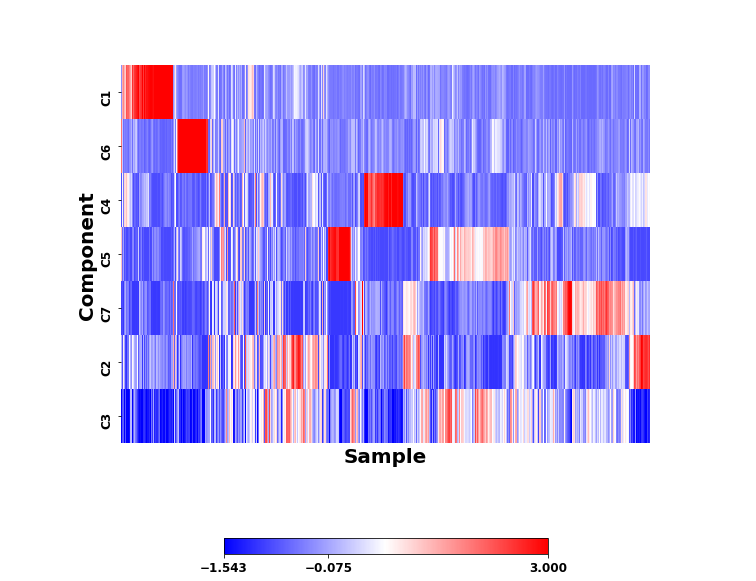

In [6]:
ccal.plot_heatmap(dataframe=h_matrix, 
                                   normalization_method='-0-', 
                                   normalization_axis=1, 
                                   cluster=True, 
                                   xlabel='Sample', 
                                   ylabel='Component', 
                                   xticklabels=False)

### 3. Define the oncogenic states

Cluster all the samples in the reference dataset using all the 7 components. Based the Consensus-Clustering-Cophenetic-Correlation coefficients Vs. k plot below, we choose a stable solution with large number of states to have increased resolution. We chose k=9.

In [ ]:
global_dist_matrix, global_clusterings, global_cophen_coeff = ccal.oncogps.define_states(
                                                            matrix=h_matrix, 
                                                            ks= range(5, 17), 
                                                            n_clusterings = 30, 
                                                            random_seed=830574,
                                                            max_std=3,                                                                                                                         
                                                            directory_path='../output/global')

### 4. Make a heatmap of the selected (k=9) states



#### 4.1 Read clustering labels

In [7]:
global_clusterings = ccal.read_gct('../output/global/clusterings/clusterings.gct')

#### 4.2 Select state labels for the k=9 oncogenic states

In [8]:
global_sample_labels = global_clusterings.ix[9, :]

#### 4.3 Define names for the components and colors for the states

In [11]:
component_names = ['C1','C2','C3','C4','C5','C6','C7']

In [10]:
colors = ['#993300',  # Brown
                '#FFD700',  # Gold
                '#E74C3C',  # Red
                '#8B008B',  # Dark magenta  
                '#B0E0E6',  # Powder blue
                '#4169E1',  # Royal blue
                '#DC143C', # Crimson  
                '#669999',   # Green
                '#F4BD60']  # Light sandy brown
               # '#2E8B57',  # Sea green
               # '#4b0082']  # Indigo 
               # '#D2691E',  # Chocolate
               # '#FA8072',  # Salmon
               # '#DA70D6', # Orchid  
               # '#90EE90']  # Light green 

#### 4.4 Produce heatmap of the samples and their membership in each state 

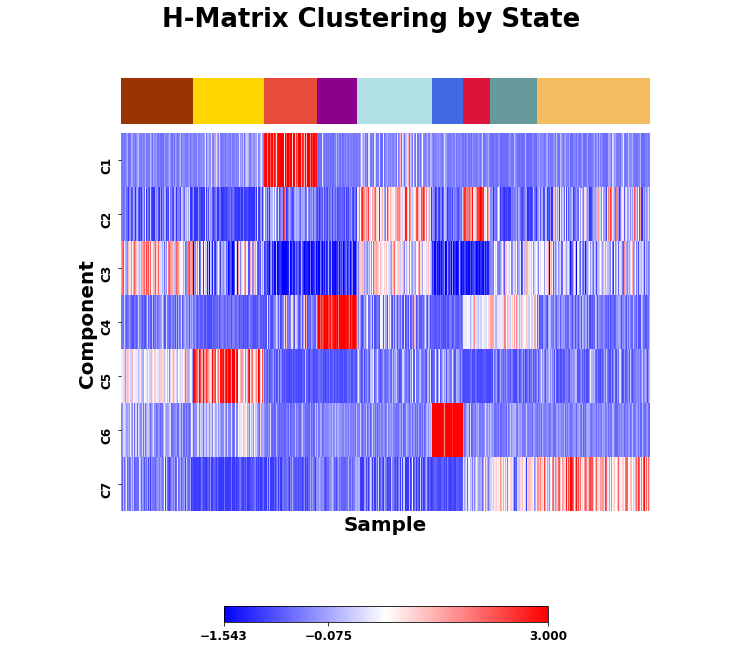

In [12]:
ccal.plot_heatmap(dataframe = h_matrix, 
                                   normalization_method='-0-',  
                                   normalization_axis=1, 
                                   data_type='continuous', 
                                   annotation_colors = colors, 
                                   column_annotation=global_sample_labels, 
                                   title='H-Matrix Clustering by State',
                                   xlabel='Sample', 
                                   ylabel='Component', 
                                   xticklabels=False)

### 5. Generate global Onco-GPS map 

(Fig S1)

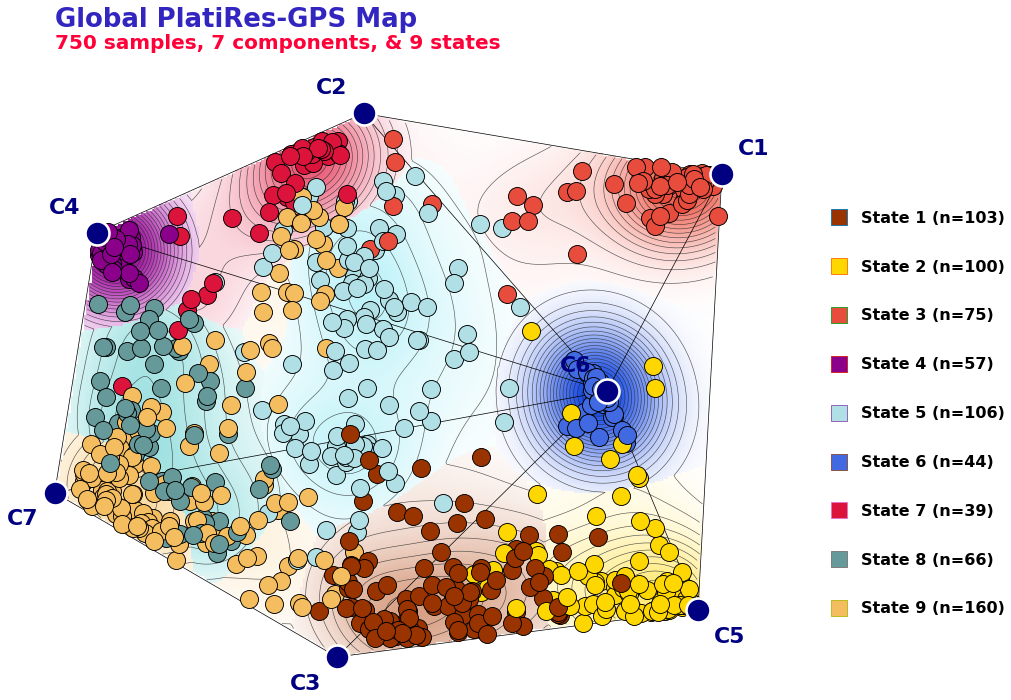

In [13]:
ccal.oncogps.make_oncogps(training_h = h_matrix, 
                                                  training_states = global_sample_labels, 
                                                  title = 'Global PlatiRes-GPS Map',
                                                  power = 2.5,
                                                  component_markersize = 24,
                                                  component_fontsize = 22,
                                                  component_markerfacecolor='#000080',
                                                  sample_markersize = 18,
                                                  mds_seed = 1234,
                                                  std_max = 2,
                                                  state_colors = colors,
                                                  kde_bandwidth_factor=1.25,
                                                  informational_mds = False,
                                                  component_names = component_names)
                                                  #filepath = DIR_RESULT + '/Global_Onco-GPS.pdf')